# Applied Mathematical Concepts

In this section, mathematical operations frequently used in machine learning and deep
learning are introduced: distance metrics, cosine similarity, and the Hadamard product. 
All are formulated in matrix form and illustrated with practical examples that allow 
understanding their usefulness in the treatment of numerical data and, in particular, 
vector representations (_embeddings_) and images.

## Distance Metrics

Distance metrics quantify the dissimilarity between vectors in a feature space. Unlike 
similarity measures (which increase with greater resemblance), distance measures decrease 
as vectors become more alike. These metrics are fundamental in many machine learning 
algorithms such as k-Nearest Neighbors (k-NN), clustering (K-Means, DBSCAN), and 
dimensionality reduction techniques.

### Euclidean Distance

The Euclidean distance is the most intuitive metric, corresponding to the straight-line 
distance between two points in Euclidean space. For two vectors $u, v \in \mathbb{R}^d$, 
it is defined as:

$$
d_{\text{Euclidean}}(u, v) = \|u - v\| = \sqrt{\sum_{i=1}^{d} (u_i - v_i)^2}
$$

This metric is sensitive to the magnitude of the vectors and assumes that all dimensions 
contribute equally to the distance. It is particularly useful when the scale of features 
is meaningful and when dealing with continuous data in geometric spaces.

**Properties:**
- Always non-negative: $d(u, v) \geq 0$
- Symmetric: $d(u, v) = d(v, u)$
- Satisfies the triangle inequality: $d(u, w) \leq d(u, v) + d(v, w)$

### Manhattan Distance

The Manhattan distance (also known as L1 distance or taxicab distance) measures the 
distance between two points by summing the absolute differences of their coordinates:

$$
d_{\text{Manhattan}}(u, v) = \|u - v\|_1 = \sum_{i=1}^{d} |u_i - v_i|
$$

The name comes from the analogy of navigating a grid-like street pattern, where movement 
is restricted to orthogonal directions. This metric is less sensitive to outliers than 
Euclidean distance and is often preferred when working with high-dimensional sparse data 
or when features have different units.

**Use cases:**
- Recommendation systems with categorical features
- Image processing (pixel-wise comparison)
- Feature spaces where diagonal movement is not meaningful

### Minkowski Distance

The Minkowski distance is a generalization that encompasses both Euclidean and Manhattan 
distances as special cases. It is defined by a parameter $p \geq 1$:

$$
d_{\text{Minkowski}}(u, v) = \left(\sum_{i=1}^{d} |u_i - v_i|^p\right)^{1/p}
$$

**Special cases:**
- $p = 1$: Manhattan distance
- $p = 2$: Euclidean distance
- $p \to \infty$: Chebyshev distance (maximum absolute difference across any dimension)

The choice of $p$ determines how much the metric emphasizes large differences between 
coordinates. Larger values of $p$ make the distance more sensitive to the largest 
coordinate difference.

### Pairwise Distance Matrix

In practice, it is often necessary to compute distances between all pairs of vectors in a 
dataset. For a matrix $X \in \mathbb{R}^{n \times d}$ where each row represents a vector, 
the pairwise distance matrix $D \in \mathbb{R}^{n \times n}$ contains the distance between 
every pair of vectors.

For Euclidean distance, an efficient matrix formulation uses the algebraic identity:

$$
\|u - v\|^2 = \|u\|^2 + \|v\|^2 - 2u \cdot v
$$

This allows computing all pairwise distances using matrix operations:

In [14]:
# 3pps
import numpy as np


def pairwise_euclidean_distance(X: np.ndarray) -> np.ndarray:
    """
    Computes the pairwise Euclidean distance matrix efficiently.

    Args:
        X: Matrix of shape (n, d) where each row is a vector

    Returns:
        Distance matrix of shape (n, n) where D[i,j] = ||X[i] - X[j]||
    """
    # Compute squared norms for each vector (n, 1)
    X_squared = np.sum(X**2, axis=1, keepdims=True)

    # Use the identity: ||x-y||² = ||x||² + ||y||² - 2x·y
    distances_squared = X_squared + X_squared.T - 2 * (X @ X.T)

    # Clip to avoid numerical errors with negative values
    distances_squared = np.maximum(distances_squared, 0)

    return np.sqrt(distances_squared)


def pairwise_manhattan_distance(X: np.ndarray) -> np.ndarray:
    """
    Computes the pairwise Manhattan distance matrix.

    Args:
        X: Matrix of shape (n, d) where each row is a vector

    Returns:
        Distance matrix of shape (n, n) where D[i,j] = ||X[i] - X[j]||_1
    """
    n = X.shape[0]
    distances = np.zeros((n, n))

    for i in range(n):
        # Broadcasting: (1, d) - (n, d) = (n, d)
        diff = np.abs(X[i : i + 1] - X)
        distances[i] = np.sum(diff, axis=1)

    return distances


# Example usage
X = np.array(
    [
        [1, 2, 3],
        [4, 5, 6],
        [1, 0, 0],
        [0, 1, 0],
    ],
    dtype=float,
)

print("Original vectors:\n", X)

euclidean_dist = pairwise_euclidean_distance(X)
print("\nPairwise Euclidean distances:\n", euclidean_dist)

manhattan_dist = pairwise_manhattan_distance(X)
print("\nPairwise Manhattan distances:\n", manhattan_dist)

# Compare distances for first two vectors
print(f"\nDistance between vectors 0 and 1:")
print(f"  Euclidean: {euclidean_dist[0, 1]:.3f}")
print(f"  Manhattan: {manhattan_dist[0, 1]:.3f}")

Original vectors:
 [[1. 2. 3.]
 [4. 5. 6.]
 [1. 0. 0.]
 [0. 1. 0.]]

Pairwise Euclidean distances:
 [[0.         5.19615242 3.60555128 3.31662479]
 [5.19615242 0.         8.36660027 8.24621125]
 [3.60555128 8.36660027 0.         1.41421356]
 [3.31662479 8.24621125 1.41421356 0.        ]]

Pairwise Manhattan distances:
 [[ 0.  9.  5.  5.]
 [ 9.  0. 14. 14.]
 [ 5. 14.  0.  2.]
 [ 5. 14.  2.  0.]]

Distance between vectors 0 and 1:
  Euclidean: 5.196
  Manhattan: 9.000


### Comparison: Distance vs. Similarity

While distance metrics measure dissimilarity, cosine similarity (discussed in the next 
section) measures angular similarity. The key differences are:

| Aspect | Distance Metrics | Cosine Similarity |
|--------|-----------------|-------------------|
| **Range** | $[0, \infty)$ | $[-1, 1]$ |
| **Magnitude sensitivity** | Sensitive to vector magnitude | Invariant to magnitude |
| **Interpretation** | Geometric separation | Angular alignment |
| **Best for** | Continuous features, clustering | Text embeddings, semantic similarity |

Distance metrics are preferred when the absolute magnitudes of features matter (e.g., 
physical measurements), while cosine similarity is preferred when only the direction or 
relative proportions matter (e.g., document term frequencies, word embeddings).

## Cosine Similarity

Cosine similarity measures the degree of similarity between two vectors based on the
angle they form, rather than their magnitude. Given a pair of vectors
$u, v \in \mathbb{R}^d$, cosine similarity is defined as:

$$
\text{sim}(u, v) = \frac{u \cdot v}{\|u\|\,\|v\|},
$$

where $u \cdot v$ denotes the dot product between $u$ and $v$, and $\|\cdot\|$ is the
Euclidean norm. The similarity value is in the range $[-1, 1]$, although in many
practical contexts (for example, with non-negative embeddings) it usually takes values
between 0 and 1. When the similarity is close to 1, the vectors point approximately in
the same direction; when it is close to 0, they are almost orthogonal; and when it is
negative, they point in opposite directions.

In machine learning tasks, cosine similarity is routinely used to compare vector
representations of elements such as words, documents, images, or users in recommendation
systems. The idea is that vectors that are angularly close represent semantically similar
entities.

Below is an example in NumPy where the cosine similarity matrix is calculated for a set
of vectors (embeddings):

In [15]:
# 3pps
import numpy as np


def normalize_matrix(matrix: np.ndarray) -> np.ndarray:
    # Normalizes each row by dividing it by its Euclidean norm
    return matrix / np.expand_dims(
        np.sqrt(np.sum(np.power(matrix, 2), axis=1)), axis=-1
    )


def cosine_similarity(matrix: np.ndarray) -> np.ndarray:
    # Assumes normalized rows: cosine similarity coincides with dot product
    return matrix @ matrix.T


X = np.array(
    [
        [1, 2, 3],
        [4, 5, 6],
        [1, 0, 0],
        [0, 1, 0],
    ],
    dtype=float,
)
print("Original embeddings:\n", X)

X_normalized = normalize_matrix(matrix=X)
print("\nNormalized embeddings:\n", X_normalized)

similarity_matrix = cosine_similarity(matrix=X_normalized)
print("\nSimilarity matrix:\n", similarity_matrix)

Original embeddings:
 [[1. 2. 3.]
 [4. 5. 6.]
 [1. 0. 0.]
 [0. 1. 0.]]

Normalized embeddings:
 [[0.26726124 0.53452248 0.80178373]
 [0.45584231 0.56980288 0.68376346]
 [1.         0.         0.        ]
 [0.         1.         0.        ]]

Similarity matrix:
 [[1.         0.97463185 0.26726124 0.53452248]
 [0.97463185 1.         0.45584231 0.56980288]
 [0.26726124 0.45584231 1.         0.        ]
 [0.53452248 0.56980288 0.         1.        ]]


In this example, each row of `X` represents a feature vector. The `normalize_matrix`
function normalizes each vector to have norm 1. Once normalized, the matrix product
`matrix @ matrix.T` produces a square matrix in which entry $(i, j)$ coincides with the
cosine similarity between the $i$-th vector and the $j$-th vector. The diagonal of this
matrix contains values equal to 1, since each vector has maximum similarity with itself.

This matrix formulation allows efficiently calculating all pairwise similarities between
a set of vectors, which is especially useful in tasks such as nearest neighbor search,
clustering, or similarity graph construction.

## Hadamard Product

The Hadamard product is an operation defined between matrices or tensors of equal shape,
consisting of element-wise multiplication. If $A$ and $B$ are matrices of the same
dimension, their Hadamard product $C = A \odot B$ is defined by:

$$C_{ij} = A_{ij} \cdot B_{ij}, $$

for all indices $i, j$. Unlike standard matrix multiplication, the Hadamard product does
not combine rows and columns, but acts independently at each position.

In machine learning and deep learning, the Hadamard product is frequently used to apply
masks, combine features locally, or implement certain attention and gating mechanisms,
where the contribution of each element of a tensor is modulated by multiplicative
factors.

The following example in PyTorch illustrates the use of the Hadamard product to apply a
mask over a data matrix:

In [16]:
# 3pps
import torch


X = torch.tensor(
    [
        [1, 2, 3],
        [4, 5, 6],
        [1, 0, 0],
        [0, 1, 0],
    ],
    dtype=float,
)
print(X)

# Create a mask of the same size as X
mask = torch.zeros_like(X)
mask[0::2, 0::2] = 1
print(mask)

# Hadamard product (element-wise)
output_tensor = X * mask
print(mask)

tensor([[1., 2., 3.],
        [4., 5., 6.],
        [1., 0., 0.],
        [0., 1., 0.]], dtype=torch.float64)
tensor([[1., 0., 1.],
        [0., 0., 0.],
        [1., 0., 1.],
        [0., 0., 0.]], dtype=torch.float64)
tensor([[1., 0., 1.],
        [0., 0., 0.],
        [1., 0., 1.],
        [0., 0., 0.]], dtype=torch.float64)


In this code, `X` contains the original data and `mask` is a tensor of the same shape,
initialized to zeros, in which ones are assigned at certain positions (rows and columns
with step 2). The product `X * mask` applies the mask over the data: where the mask
equals 1, the original value is preserved; where it equals 0, the result is nullified.
This pattern is very common for selecting or attenuating specific regions in matrices or
higher-dimensional tensors.

### Advanced Example: Segmentation and "Pseudo-Attention" in Images

The Hadamard product becomes especially interesting when working with images, which can
be represented as tensors of size $(\text{height}, \text{width}, \text{channels})$. A
typical application consists of segmenting an image to isolate a region of interest and,
subsequently, applying a mask over the original image to highlight or suppress that
region.

The following example illustrates a workflow that combines several techniques:

1. Loading an image in RGB format and visualization.
2. Conversion to grayscale and intensity normalization.
3. Image segmentation using clustering (K-Means) with two classes.
4. Refinement of the resulting mask using morphological operations (hole filling and
   closing).
5. Application of the refined mask over the original image using a Hadamard product,
   generating a "pseudo-attention mechanism" effect.

Image shape: (531, 612, 3)
255 0


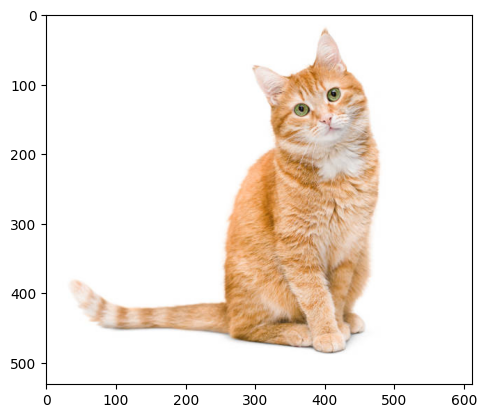

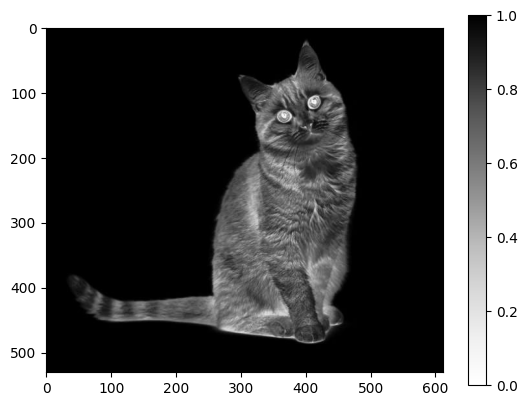

gray_scale_image shape: (531, 612)


(np.float64(1.0), np.float64(0.011764705882352941))

In [17]:
# 3pps
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image
from scipy import ndimage
from sklearn.cluster import KMeans


# Load the image
image = np.asarray(
    Image.open(
        "/home/dani/Repositorios/unie-deep-learning/docs/assets/course/topic_02_mathematics/cat_image.jpg"
    )
)
print(f"Image shape: {image.shape}")
print(image.max(), image.min())
plt.imshow(image)
plt.show()

# Convert to grayscale and normalize to [0, 1]
gray_scale_image = np.mean(image / 255.0, axis=-1)
plt.imshow(gray_scale_image, vmin=0, vmax=1, cmap="Grays")
plt.colorbar()
plt.show()

print(f"gray_scale_image shape: {gray_scale_image.shape}")
gray_scale_image.max(), gray_scale_image.min()

At this point, a grayscale image is available represented as a 2D matrix of values in the
range $[0, 1]$. Next, K-Means is applied to group pixels into two clusters, which can be
interpreted as background and object, depending on intensity:

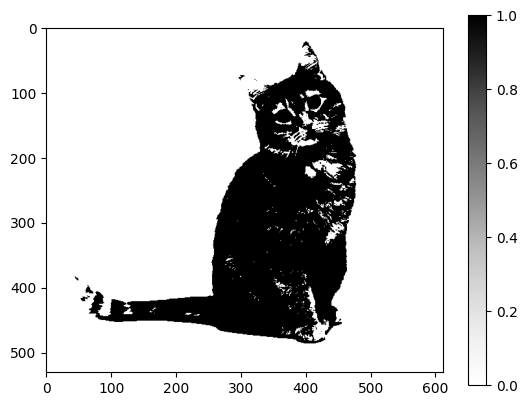

In [18]:
# Prepare data for K-Means: vectorize the image
X = np.expand_dims(gray_scale_image.flatten(), axis=-1)

# Fit a K-Means model with 2 clusters
kmeans = KMeans(n_clusters=2, random_state=0, n_init="auto").fit(X)

# Reconstruct the cluster mask with the image shape
kmeans_mask = kmeans.labels_.reshape(gray_scale_image.shape)
kmeans_mask.max(), kmeans_mask.min()

plt.imshow(kmeans_mask, vmin=0, vmax=1, cmap="Grays")
plt.colorbar()
plt.show()

The resulting mask may contain fragmented regions or small holes. To improve its spatial
coherence, morphological operations are applied using `scipy.ndimage`:

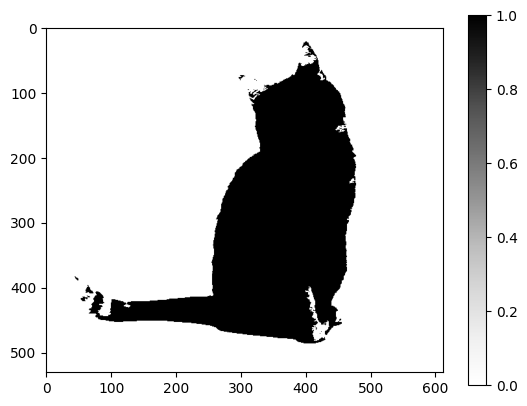

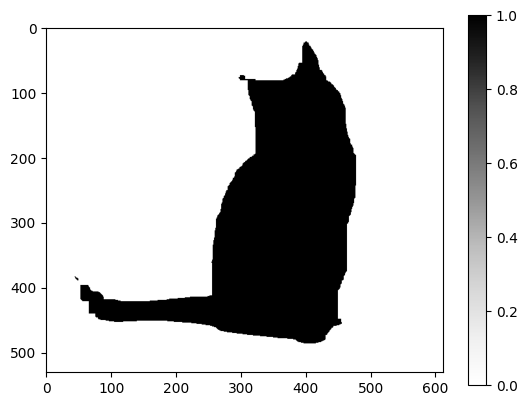

In [19]:
# Fill holes in the mask
filled_kmeans_mask = ndimage.binary_fill_holes(kmeans_mask)
plt.imshow(filled_kmeans_mask, vmin=0, vmax=1, cmap="Grays")
plt.colorbar()
plt.show()

# Closing operation to smooth the mask and eliminate imperfections
structure = np.ones((5, 5))  # A larger kernel implies more interpolation
closed_filled_kmeans_mask = ndimage.binary_closing(
    filled_kmeans_mask,
    structure=structure,
    iterations=10,
)
plt.imshow(closed_filled_kmeans_mask, vmin=0, vmax=1, cmap="Grays")
plt.colorbar()
plt.show()

Once the mask is refined, it is applied over the original image using a Hadamard product
extended to the three color channels. To do this, the binary mask is replicated along the
channel axis:

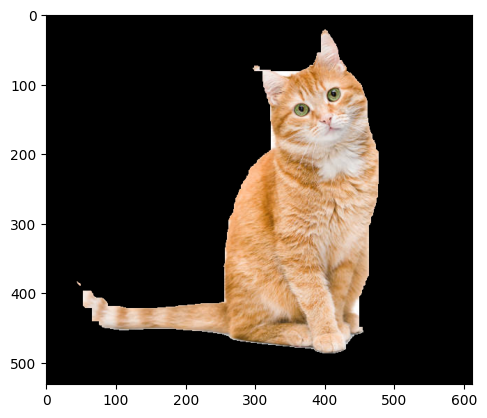

In [20]:
# Replicate the binary mask in the 3 color channels
mask_3channels = np.repeat(
    np.expand_dims(closed_filled_kmeans_mask, -1),
    3,
    axis=-1,
)

# Apply the mask to the original image (pseudo-attention mechanism)
pseudo_attention_mechanism = image * mask_3channels
plt.imshow(pseudo_attention_mechanism)
plt.show()

This procedure acts as a "pseudo-attention mechanism" because the binary mask highlights
a region of the image (for example, the main figure, such as a cat) and attenuates the
rest. Although this is not a learned attention mechanism, like those used in modern
architectures (for example, Transformers), it illustrates how an operation as simple as
the Hadamard product can be used to focus processing on specific areas of an input
tensor.

## Bibliography

+ [How to Convert an RGB Image to Grayscale](https://brandonrohrer.com/convert_rgb_to_grayscale.html)